In [ ]:
import requests
import os

# Define the base URLs
base_url_1 = "https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/{}/99495199999.csv"
base_url_2 = "https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/{}/72429793812.csv"

# Define the range of years
years = range(2015, 2025)

# Base directory to save the downloaded files
base_output_dir = "./weather_data/"

# Loop through each year and download the CSV files for both datasets
for year in years:
    # Create a directory for each year
    year_dir = os.path.join(base_output_dir, str(year))
    os.makedirs(year_dir, exist_ok=True)

    # Download each file (Florida and Cincinnati)
    for base_url, station_id in [(base_url_1, "99495199999"), (base_url_2, "72429793812")]:
        url = base_url.format(year)
        response = requests.get(url)

        # Check if the request was successful
        if response.status_code == 200:
            # Save the file in the appropriate year directory
            file_path = os.path.join(year_dir, f"{station_id}.csv")
            with open(file_path, "wb") as file:
                file.write(response.content)
            print(f"Downloaded: {file_path}")
        else:
            print(f"Failed to download {url}. Status code: {response.status_code}")


Downloaded: ./weather_data/2015/99495199999.csv
Downloaded: ./weather_data/2015/72429793812.csv
Failed to download https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/2016/99495199999.csv. Status code: 404
Downloaded: ./weather_data/2016/72429793812.csv
Downloaded: ./weather_data/2017/99495199999.csv
Downloaded: ./weather_data/2017/72429793812.csv
Downloaded: ./weather_data/2018/99495199999.csv
Downloaded: ./weather_data/2018/72429793812.csv
Downloaded: ./weather_data/2019/99495199999.csv
Downloaded: ./weather_data/2019/72429793812.csv
Downloaded: ./weather_data/2020/99495199999.csv
Downloaded: ./weather_data/2020/72429793812.csv
Downloaded: ./weather_data/2021/99495199999.csv
Downloaded: ./weather_data/2021/72429793812.csv
Downloaded: ./weather_data/2022/99495199999.csv
Downloaded: ./weather_data/2022/72429793812.csv
Downloaded: ./weather_data/2023/99495199999.csv
Downloaded: ./weather_data/2023/72429793812.csv
Downloaded: ./weather_data/2024/99495199999.csv
Downloaded: ./

In [ ]:
import os
import pandas as pd

# Define the base input and output directories
base_input_dir = "./weather_data/"
base_output_dir = "./cleaned_weather_data/"

# Define the invalid value representations
invalid_values = {
#     "TEMP": 9999.9,
#     "DEWP": 9999.9,
#     "SLP": 9999.9,
#     "STP": 9999.9,
#     "VISIB": 999.9,
#     "WDSP": 999.9,
    "MXSPD": 999.9,
#     "GUST": 999.9,
    "MAX": 9999.9,
#     "MIN": 9999.9,
#     "PRCP": 99.99,
#     "SNDP": 999.9
}

# Loop through each year directory
for year in range(2015, 2025):
    year_dir = os.path.join(base_input_dir, str(year))

    # Check if the year directory exists
    if os.path.exists(year_dir):
        # Loop through each file in the year directory
        for station_id in ["99495199999", "72429793812"]:
            file_path = os.path.join(year_dir, f"{station_id}.csv")

            # Check if the file exists
            if os.path.exists(file_path):
                # Read the CSV file into a DataFrame
                df = pd.read_csv(file_path)

                # Filter out rows with invalid values
                for column, invalid_value in invalid_values.items():
                    df = df[df[column] != invalid_value]

                # Create the output directory for the year if it doesn't exist
                output_year_dir = os.path.join(base_output_dir, str(year))
                os.makedirs(output_year_dir, exist_ok=True)

                # Save the cleaned DataFrame to the new directory
                cleaned_file_path = os.path.join(output_year_dir, f"{station_id}.csv")
                df.to_csv(cleaned_file_path, index=False)
                print(f"Cleaned data saved to: {cleaned_file_path}")
            else:
                print(f"File not found: {file_path}")
    else:
        print(f"Year directory not found: {year_dir}")

Cleaned data saved to: ./cleaned_weather_data/2015/99495199999.csv
Cleaned data saved to: ./cleaned_weather_data/2015/72429793812.csv
File not found: ./weather_data/2016/99495199999.csv
Cleaned data saved to: ./cleaned_weather_data/2016/72429793812.csv
Cleaned data saved to: ./cleaned_weather_data/2017/99495199999.csv
Cleaned data saved to: ./cleaned_weather_data/2017/72429793812.csv
Cleaned data saved to: ./cleaned_weather_data/2018/99495199999.csv
Cleaned data saved to: ./cleaned_weather_data/2018/72429793812.csv
Cleaned data saved to: ./cleaned_weather_data/2019/99495199999.csv
Cleaned data saved to: ./cleaned_weather_data/2019/72429793812.csv
Cleaned data saved to: ./cleaned_weather_data/2020/99495199999.csv
Cleaned data saved to: ./cleaned_weather_data/2020/72429793812.csv
Cleaned data saved to: ./cleaned_weather_data/2021/99495199999.csv
Cleaned data saved to: ./cleaned_weather_data/2021/72429793812.csv
Cleaned data saved to: ./cleaned_weather_data/2022/99495199999.csv
Cleaned da

In [ ]:
from pyspark.sql import SparkSession
import os

# Initialize Spark session
spark = SparkSession.builder.appName("WeatherDataCount").getOrCreate()

# Base path to the weather data
base_path = "./weather_data/"

# Dictionary to hold the counts of datasets
dataset_counts = {}

# Loop through each year from 2015 to 2024
for year in range(2015, 2025):
    for station_code in ['99495199999', '72429793812']:  # Florida and Cincinnati
        file_path = os.path.join(base_path, str(year), f"{station_code}.csv")

        # Load the CSV file if it exists
        if os.path.exists(file_path):
            df = spark.read.csv(file_path, header=True, inferSchema=True)
            count = df.count()  # Get the count of rows
            dataset_counts[f"{year}/{station_code}"] = count

# Display the counts of each dataset
for dataset, count in dataset_counts.items():
    print(f"Dataset: {dataset}, Count: {count}")

# Stop the Spark session
spark.stop()

Dataset: 2015/99495199999, Count: 355
Dataset: 2015/72429793812, Count: 365
Dataset: 2016/72429793812, Count: 366
Dataset: 2017/99495199999, Count: 283
Dataset: 2017/72429793812, Count: 365
Dataset: 2018/99495199999, Count: 363
Dataset: 2018/72429793812, Count: 365
Dataset: 2019/99495199999, Count: 345
Dataset: 2019/72429793812, Count: 365
Dataset: 2020/99495199999, Count: 365
Dataset: 2020/72429793812, Count: 366
Dataset: 2021/99495199999, Count: 104
Dataset: 2021/72429793812, Count: 365
Dataset: 2022/99495199999, Count: 259
Dataset: 2022/72429793812, Count: 365
Dataset: 2023/99495199999, Count: 276
Dataset: 2023/72429793812, Count: 365
Dataset: 2024/99495199999, Count: 133
Dataset: 2024/72429793812, Count: 366


In [ ]:
from pyspark.sql import functions as F
import os

# Initialize an empty list to store results
march_data = []

# Initialize Spark session
spark = SparkSession.builder.appName("Coldest Day").getOrCreate()

# Base path to the weather data
base_path = "./cleaned_weather_data/"

# Loop through the years to collect March data
for year in range(2015, 2025):
    year_dir = os.path.join(base_path, str(year))
    for filename in os.listdir(year_dir):
        if filename.endswith('.csv'):
            df = spark.read.csv(os.path.join(year_dir, filename), header=True, inferSchema=True)

            # Filter for March data
            march_df = df.filter(df.DATE.contains('-03-'))

            if not march_df.isEmpty():
                # Get the coldest day for March in the current DataFrame
                coldest_day = march_df.orderBy(F.asc("MIN")).first()

                # Append results
                if coldest_day is not None:
                    march_data.append((coldest_day.STATION, coldest_day.NAME, coldest_day.DATE, coldest_day.MIN))

# Convert results to a DataFrame for display
if march_data:
    coldest_day_df = spark.createDataFrame(march_data, ["STATION", "NAME", "DATE", "MIN"])
    # Sort by MIN to get the overall coldest day in March
    overall_coldest_day = coldest_day_df.orderBy(F.asc("MIN")).first()
    overall_coldest_day_df = spark.createDataFrame([overall_coldest_day], ["STATION", "NAME", "DATE", "MIN"])
    overall_coldest_day_df.show()  # Display only the overall coldest day
else:
    print("No March data found across the datasets.")


+-----------+--------------------+----------+---+
|    STATION|                NAME|      DATE|MIN|
+-----------+--------------------+----------+---+
|72429793812|CINCINNATI MUNICI...|2015-03-06|3.2|
+-----------+--------------------+----------+---+



In [ ]:
from pyspark.sql import functions as F
import os

# Initialize an empty list to store results
annual_precipitation = []

# Initialize Spark session
spark = SparkSession.builder.appName("Most Precipitation").getOrCreate()

# Base path to the cleaned weather data
base_path = "./cleaned_weather_data/"

# Loop through the years to calculate mean precipitation
for year in range(2015, 2025):
    year_dir = os.path.join(base_path, str(year))
    for filename in os.listdir(year_dir):
        if filename.endswith('.csv'):
            # Read the CSV file into a DataFrame
            df = spark.read.csv(os.path.join(year_dir, filename), header=True, inferSchema=True)

            # Check if the DataFrame is empty
            if df.isEmpty():
                continue  # Skip to the next file

            # Check if the DataFrame contains the 'PRCP' column
            if "PRCP" not in df.columns:
                print(f"'PRCP' column not found in {filename}")
                continue

            # Calculate mean of PRCP
            mean_prcp = df.agg(F.mean("PRCP").alias("Mean_PRCP")).first().Mean_PRCP

            # Get station info
            station_id = df.select("STATION").first().STATION
            station_name = df.select("NAME").first().NAME

            # Append results
            annual_precipitation.append((station_id, station_name, year, mean_prcp))

# Create a DataFrame from the results
annual_precipitation_df = spark.createDataFrame(annual_precipitation, ["STATION", "NAME", "YEAR", "Mean_PRCP"])

# Find the year with the most precipitation for each station
cincinnati_max_prcp = annual_precipitation_df.filter(annual_precipitation_df.STATION == "72429793812") \
    .orderBy(F.desc("Mean_PRCP")).first()

florida_max_prcp = annual_precipitation_df.filter(annual_precipitation_df.STATION == "99495199999") \
    .orderBy(F.desc("Mean_PRCP")).first()

# Display the results
if cincinnati_max_prcp:
    print(f"Cincinnati: STATION={cincinnati_max_prcp.STATION}, NAME={cincinnati_max_prcp.NAME}, YEAR={cincinnati_max_prcp.YEAR}, Mean of PRCP={cincinnati_max_prcp.Mean_PRCP}")

if florida_max_prcp:
    print(f"Florida: STATION={florida_max_prcp.STATION}, NAME={florida_max_prcp.NAME}, YEAR={florida_max_prcp.YEAR}, Mean of PRCP={florida_max_prcp.Mean_PRCP}")

Cincinnati: STATION=72429793812, NAME=CINCINNATI MUNICIPAL AIRPORT LUNKEN FIELD, OH US, YEAR=2024, Mean of PRCP=4.503497267759559
Florida: STATION=99495199999, NAME=SEBASTIAN INLET STATE PARK, FL US, YEAR=2019, Mean of PRCP=0.0


In [ ]:
from pyspark.sql import SparkSession
import os

# Initialize Spark session
spark = SparkSession.builder.appName("Wind Gust Missing Values").getOrCreate()

# Base path to the cleaned weather data
base_path = "./cleaned_weather_data/2024/"

# Station codes for Florida and Cincinnati
station_codes = ['99495199999', '72429793812']  # Florida, Cincinnati
results = []

# Loop through each station code
for station_code in station_codes:
    file_path = os.path.join(base_path, f"{station_code}.csv")

    # Load the CSV file if it exists
    if os.path.exists(file_path):
        df = spark.read.csv(file_path, header=True, inferSchema=True)

        # Count total rows and missing values in the GUST column
        total_count = df.count()
        missing_count = df.filter(df.GUST == 999.9).count()

        # Calculate the percentage of missing values
        if total_count > 0:
            missing_percentage = (missing_count / total_count) * 100
        else:
            missing_percentage = 0.0

        # Store the result for this station
        results.append((station_code, missing_percentage))

# Display the results
for station_code, missing_percentage in results:
    print(f"Station Code: {station_code}, Missing GUST Percentage in the year 2024: {missing_percentage:.2f}%")

# Stop the Spark session
spark.stop()

Station Code: 99495199999, Missing GUST Percentage in the year 2024: 100.00%
Station Code: 72429793812, Missing GUST Percentage in the year 2024: 39.07%


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import mean, col, stddev, expr
from pyspark.sql import functions as F

# Initialize Spark session
spark = SparkSession.builder.appName("Temperature Analysis").getOrCreate()

# Load the data
df = spark.read.csv("./cleaned_weather_data/2020/72429793812.csv", header=True, inferSchema=True)

# Extract month from date (assuming there's a DATE column)
df_cincinnati = df.withColumn("MONTH", F.month(col("DATE")))

# Group by month and calculate statistics
result = df_cincinnati.groupBy("MONTH").agg(
    mean("TEMP").alias("Mean"),
    expr("percentile_approx(TEMP, 0.5)").alias("Median"),  # Median
    F.mode("TEMP").alias("Mode"),  # Mode
    stddev("TEMP").alias("Standard Deviation")
)

# Show results
result.orderBy("MONTH").show()

+-----+------------------+------+----+------------------+
|MONTH|              Mean|Median|Mode|Standard Deviation|
+-----+------------------+------+----+------------------+
|    1| 37.94516129032259|  37.7|43.1| 8.345810873712928|
|    2|  36.5896551724138|  36.0|25.9|  7.90159770587055|
|    3|  49.0741935483871|  47.8|39.6| 8.779406500135623|
|    4|51.779999999999994|  51.0|48.4| 7.313162436838541|
|    5| 60.89032258064518|  63.7|73.9| 9.314768017820217|
|    6| 72.54666666666667|  73.7|74.2| 4.899946047087439|
|    7|              77.6|  77.9|72.5|  2.33794781806609|
|    8| 73.34516129032258|  73.7|73.2| 3.487868375734898|
|    9|              66.1|  65.8|60.6| 7.118262089331474|
|   10|55.193548387096776|  54.0|51.1|  6.72869157582517|
|   11|48.003333333333345|  47.7|47.7| 6.825938527529321|
|   12| 35.99354838709677|  35.2|32.1| 6.642787340861814|
+-----+------------------+------+----+------------------+



In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, expr, unix_timestamp, date_format

# Initialize Spark session
spark = SparkSession.builder.appName("Wind Chill Analysis").getOrCreate()

# Load the data
df = spark.read.csv("./cleaned_weather_data/2017/72429793812.csv", header=True, inferSchema=True)

# Filter for TEMP < 50°F, and WDSP > 3 mph
df_cincinnati = df.filter((col("TEMP") < 50) & (col("WDSP") > 3))

# Calculate Wind Chill using the given formula
df_cincinnati = df_cincinnati.withColumn(
    "Wind Chill",
    35.74 + (0.6215 * col("TEMP")) - (35.75 * (col("WDSP") ** 0.16)) + (0.4275 * col("TEMP") * (col("WDSP") ** 0.16))
)

# Add a date column for sorting
# Assuming there's a DATE column, we format it to just keep the date part
df_cincinnati = df_cincinnati.withColumn("DATE", date_format("DATE", "yyyy-MM-dd"))

# Select relevant columns and sort by Wind Chill
result = df_cincinnati.select("DATE", "Wind Chill").orderBy("Wind Chill").limit(10)

# Show results
result.show()

+----------+-------------------+
|      DATE|         Wind Chill|
+----------+-------------------+
|2017-01-07|-0.4140156367932173|
|2017-12-31| 2.0339767075993116|
|2017-12-27|  3.820645509123832|
|2017-12-28|  4.533355269061226|
|2017-01-06|  4.868933041653884|
|2017-01-08|  7.929748208036862|
|2017-12-25| 14.285113218297408|
|2017-12-30| 14.539211253038193|
|2017-01-05| 14.748861828163854|
|2017-12-26| 15.688977805634499|
+----------+-------------------+



In [ ]:
from pyspark.sql import functions as F
import os

# Base path to the weather data
base_path = "./cleaned_weather_data/"

# Initialize a dictionary to store the hottest days per year
hottest_days = {}

# Initialize Spark session before the loop
# This ensures the Spark session is active throughout the data processing
spark = SparkSession.builder.appName("Most Precipitation").getOrCreate()

# Loop through the years to find the hottest day
for year in range(2015, 2025):
    year_dir = os.path.join(base_path, str(year))
    for filename in os.listdir(year_dir):
        if filename.endswith('.csv'):
            # Read the CSV file into a DataFrame
            df = spark.read.csv(os.path.join(year_dir, filename), header=True, inferSchema=True)

            # Check if the DataFrame is empty
            if df.isEmpty():
                continue  # Skip to the next file

            # Check if the "MAX" column exists
            if "MAX" not in df.columns:
                print(f"The 'MAX' column does not exist in {filename}.")
                continue  # Skip to the next file

            # Find the hottest day for the current DataFrame
            max_day = df.orderBy(F.desc("MAX")).first()

            # Check if max_day is None
            if max_day is not None:
                # Store the hottest day only if the year is not already recorded
                if year not in hottest_days:
                    hottest_days[year] = (max_day.STATION, max_day.NAME, max_day.DATE, max_day.MAX)

# Convert results to a DataFrame for display
if hottest_days:
    hottest_days_list = [(year, *data) for year, data in hottest_days.items()]
    hottest_days_df = spark.createDataFrame(hottest_days_list, ["YEAR", "STATION", "NAME", "DATE", "MAX"])
    hottest_days_df.show()
else:
    print("No hottest days found across the datasets.")


+----+-----------+--------------------+----------+-----+
|YEAR|    STATION|                NAME|      DATE|  MAX|
+----+-----------+--------------------+----------+-----+
|2015|72429793812|CINCINNATI MUNICI...|2015-06-12| 91.9|
|2016|72429793812|CINCINNATI MUNICI...|2016-07-24| 93.9|
|2017|72429793812|CINCINNATI MUNICI...|2017-07-22| 91.9|
|2018|72429793812|CINCINNATI MUNICI...|2018-07-04| 96.1|
|2019|72429793812|CINCINNATI MUNICI...|2019-09-30| 95.0|
|2020|72429793812|CINCINNATI MUNICI...|2020-07-05| 93.9|
|2021|72429793812|CINCINNATI MUNICI...|2021-08-12| 95.0|
|2022|72429793812|CINCINNATI MUNICI...|2022-06-14| 96.1|
|2023|72429793812|CINCINNATI MUNICI...|2023-08-23| 96.1|
|2024|72429793812|CINCINNATI MUNICI...|2024-08-30|100.9|
+----+-----------+--------------------+----------+-----+



In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import os

# Initialize a Spark session
spark = SparkSession.builder \
    .appName("Extreme Weather Analysis for Florida") \
    .getOrCreate()

# Define the directory containing cleaned weather data
base_directory = './cleaned_weather_data/'
file_paths = []

# Collect all relevant file paths for Florida
for year in range(2015, 2025):  # Adjust the range as necessary
    file_path = os.path.join(base_directory, str(year), '99495199999.csv')
    if os.path.exists(file_path):
        file_paths.append(file_path)

# Load all the CSV files into a single DataFrame
df = spark.read.csv(file_paths, header=True, inferSchema=True)
# Count the number of days with extreme weather conditions
extreme_weather_count = df.filter(col("FRSHTT") != 0).count()

# Show the result
print(f"Number of days with extreme weather conditions in Florida: {extreme_weather_count}")

# Stop the Spark session
spark.stop()

Number of days with extreme weather conditions in Florida: 0


In [ ]:
import os
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, dayofyear, month, max as spark_max, when
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

# Initialize Spark session
spark = SparkSession.builder.appName("Weather Data Prediction").getOrCreate()

# Define base directory for your CSV files
base_directory = './cleaned_weather_data'
file_paths = []

# Collect file paths for relevant years (2022, 2023) for station "72429793812"
for year in [2022, 2023]:
    file_path = os.path.join(base_directory, str(year), '72429793812.csv')
    if os.path.exists(file_path):
        file_paths.append(file_path)

# Load all the CSV files into a single DataFrame
historical_data = spark.read.csv(file_paths, header=True, inferSchema=True)

# Filter data for November and December (months 11 and 12) and for station "72429793812"
historical_df = historical_data.filter(
    (col("STATION") == "72429793812") & (month("DATE").isin([11, 12]))
)

# Prepare the training data by adding the day of the year
training_data = historical_df.withColumn("DAY_OF_YEAR", dayofyear("DATE"))

# Assemble the features
assembler = VectorAssembler(inputCols=["DAY_OF_YEAR"], outputCol="features")
train_data = assembler.transform(training_data).select("features", col("MAX").alias("label"))

# Train the Linear Regression model
lr = LinearRegression()
lr_model = lr.fit(train_data)

# Prepare data for predicting for each day in November and December 2024 (days 305 to 365 of the year)
predictions_df = spark.createDataFrame(
    [(day,) for day in range(305, 366)], ["DAY_OF_YEAR"]
)

# Transform the prediction data with the same assembler
predictions = assembler.transform(predictions_df)

# Generate predictions using the trained model
predicted_temps = lr_model.transform(predictions)

# Identify the maximum predicted temperature for November and December
max_predictions = predicted_temps.withColumn(
    "MONTH", when(col("DAY_OF_YEAR") < 335, 11).otherwise(12)
).groupBy("MONTH").agg(spark_max("prediction").alias("Max Predicted Temp"))

# Show the maximum temperature predictions for November and December 2024
max_predictions.show()

# Stop the Spark session
spark.stop()

+-----+------------------+
|MONTH|Max Predicted Temp|
+-----+------------------+
|   11| 65.71804308370848|
|   12| 55.37627286049107|
+-----+------------------+



In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.67      0.75        18
           1       0.99      1.00      1.00      1044

    accuracy                           0.99      1062
   macro avg       0.93      0.83      0.87      1062
weighted avg       0.99      0.99      0.99      1062

Accuracy: 0.992467043314501


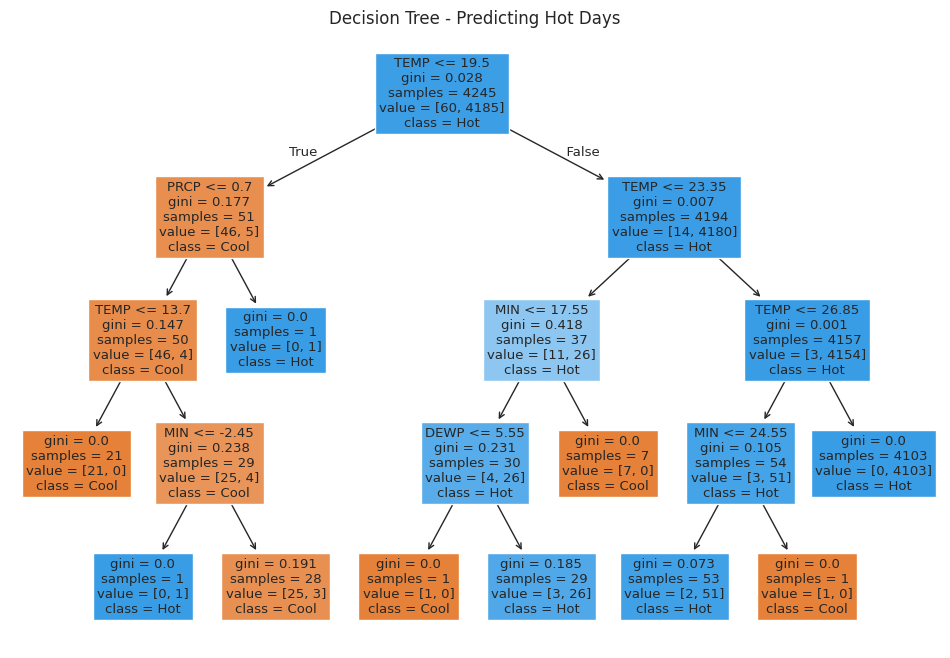

In [ ]:
# Make sure 'weather_df' is already loaded and cleaned
df = weather_df[['MAX', 'MIN', 'TEMP', 'PRCP', 'DEWP']].dropna()

# Create target variable: 1 if MAX > 30 (hot day), else 0
df['HOT_DAY'] = (df['MAX'] > 30).astype(int)

# Features and target
X = df[['MIN', 'TEMP', 'PRCP', 'DEWP']]
y = df['HOT_DAY']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=['Cool', 'Hot'], filled=True)
plt.title("Decision Tree - Predicting Hot Days")
plt.show()


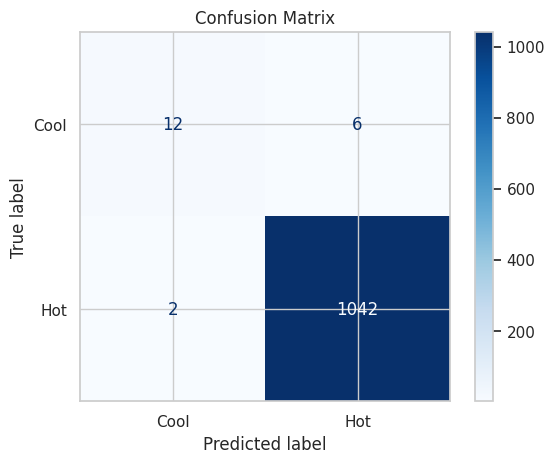

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Cool", "Hot"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Step 1: Install libraries (only if needed)
!pip install seaborn --quiet


In [ ]:
# Step 2: Import libraries
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style='whitegrid')


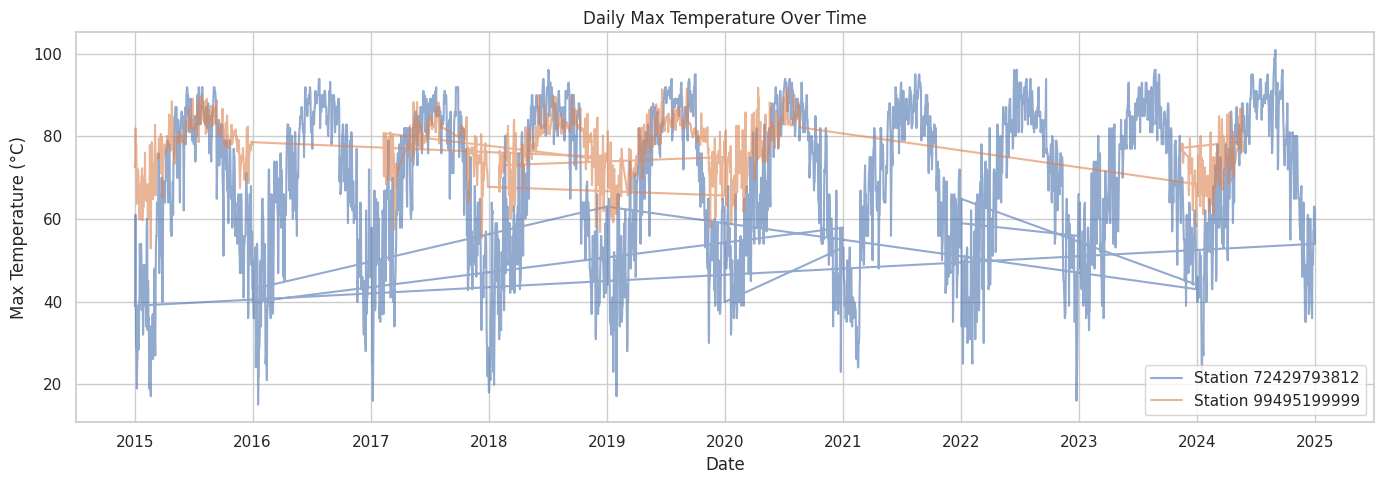

In [ ]:
# Step 5: Line Plot - Max Temperature Over Time
plt.figure(figsize=(14, 5))
for station in weather_df['STATION'].unique():  # Changed 'STATION_ID' to 'STATION'
    subset = weather_df[weather_df['STATION'] == station]
    plt.plot(subset['DATE'], subset['MAX'], label=f"Station {station}", alpha=0.6)
plt.title('Daily Max Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Max Temperature (°C)')
plt.legend()
plt.tight_layout()
plt.show()

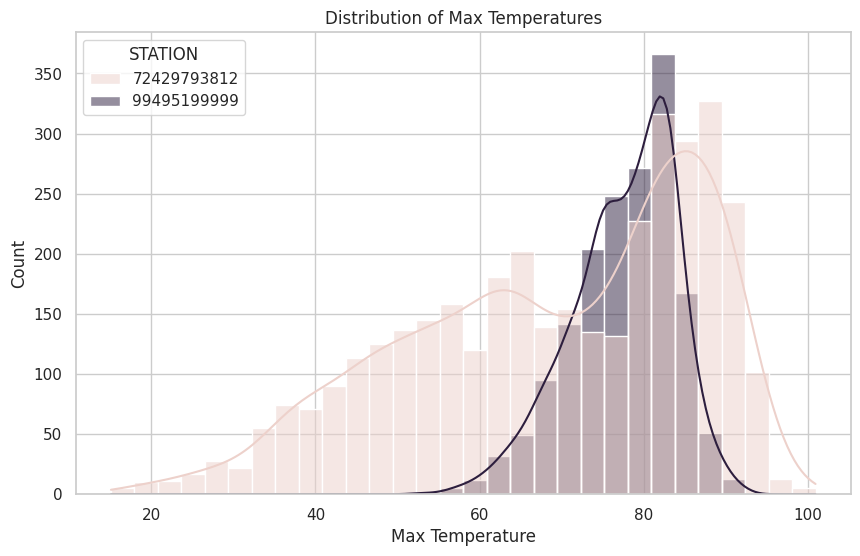

In [ ]:
# Step 7: Histogram of Max Temperatures
plt.figure(figsize=(10, 6))
sns.histplot(weather_df, x='MAX', hue='STATION', kde=True, bins=30) # Changed 'STATION_ID' to 'STATION'
plt.title('Distribution of Max Temperatures')
plt.xlabel('Max Temperature')
plt.show()

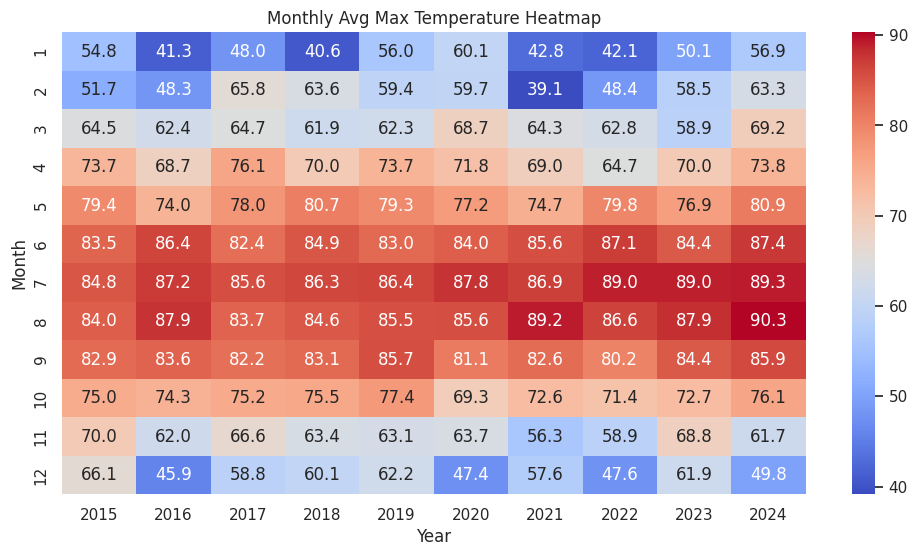

In [ ]:
# Step 8: Heatmap of Monthly Average Max Temperatures
# Convert 'DATE' column to datetime if it's not already
weather_df['DATE'] = pd.to_datetime(weather_df['DATE'])

# Now you can extract the month and year
weather_df['MONTH'] = weather_df['DATE'].dt.month
weather_df['YEAR'] = weather_df['DATE'].dt.year # Extract year from the 'DATE' column

# Assuming you have a 'STATION' column (as used in previous plots),
# replace 'STATION_ID' with 'STATION' for consistency
monthly_avg = weather_df.groupby(['YEAR', 'MONTH', 'STATION'])['MAX'].mean().reset_index()
pivot = monthly_avg.pivot_table(index='MONTH', columns='YEAR', values='MAX')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Monthly Avg Max Temperature Heatmap')
plt.ylabel('Month')
plt.xlabel('Year')
plt.show()

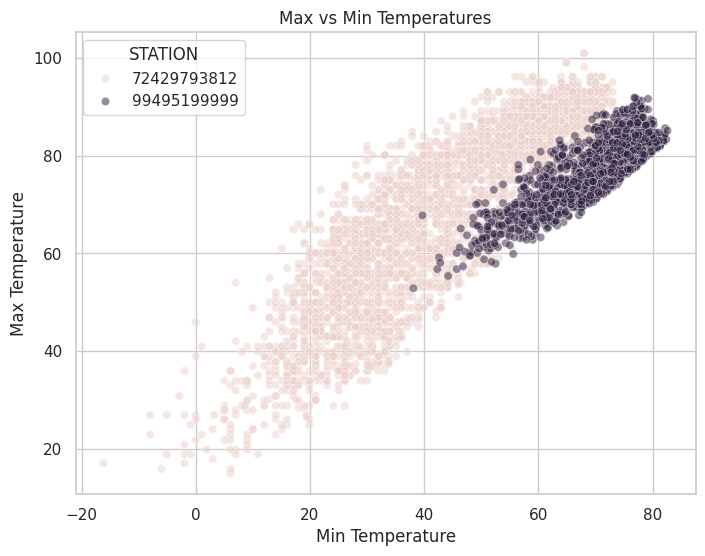

In [ ]:
# Step 9: Scatter Plot of Max vs. Min Temperatures
plt.figure(figsize=(8, 6))
sns.scatterplot(data=weather_df, x='MIN', y='MAX', hue='STATION', alpha=0.5)  # Changed 'STATION_ID' to 'STATION'
plt.title('Max vs Min Temperatures')
plt.xlabel('Min Temperature')
plt.ylabel('Max Temperature')
plt.show()

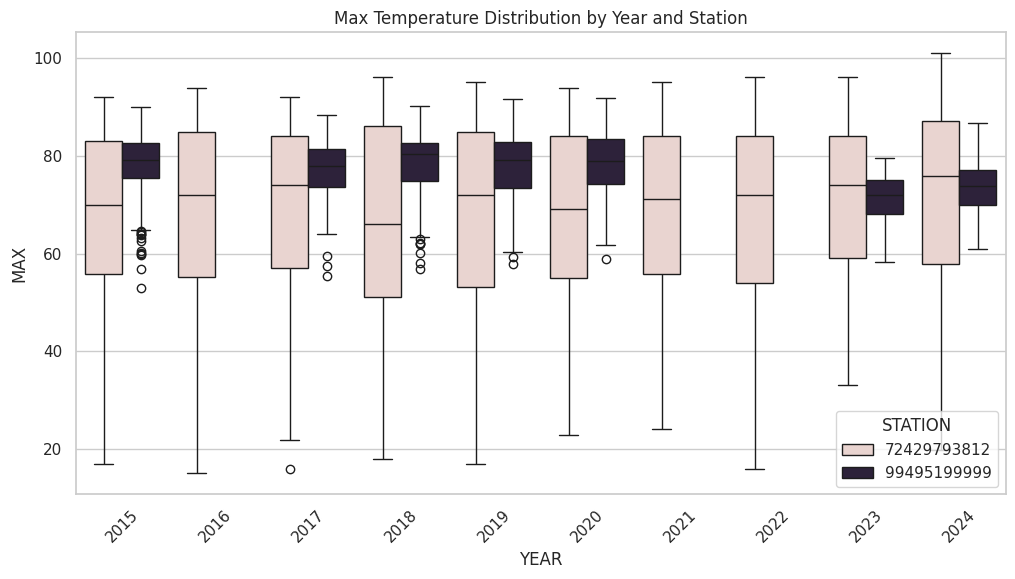

In [ ]:
# Step 6: Box Plot - Max Temps by Year
plt.figure(figsize=(12, 6))
sns.boxplot(data=weather_df, x='YEAR', y='MAX', hue='STATION') # Changed 'STATION_ID' to 'STATION'
plt.title('Max Temperature Distribution by Year and Station')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Define base directory for your CSV files
base_directory = './cleaned_weather_data'  # Assuming your cleaned weather data is here
file_paths = []

# Collect all CSV file paths
for year in range(2015, 2025):  # Adjust years as needed
    year_dir = os.path.join(base_directory, str(year))
    for filename in os.listdir(year_dir):
        if filename.endswith('.csv'):
            file_paths.append(os.path.join(year_dir, filename))

# Load all the CSV files into a single DataFrame using pandas
all_dfs = [pd.read_csv(file_path) for file_path in file_paths]
weather_df = pd.concat(all_dfs, ignore_index=True)

# Select relevant columns
features = ['TEMP', 'DEWP', 'SLP', 'WDSP', 'MXSPD', 'MAX', 'MIN']

# Assuming 'weather_df' contains the data
# If a different DataFrame should be used, replace 'weather_df' with the correct name
df_filtered = weather_df[features].dropna()  # Changed 'df' to 'weather_df'

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_filtered)

<ipython-input-11-5a7165eabc39>:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  weather_df = pd.concat(all_dfs, ignore_index=True)


In [ ]:
from sklearn.cluster import KMeans

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=0)
df_filtered['Cluster'] = kmeans.fit_predict(X_scaled)


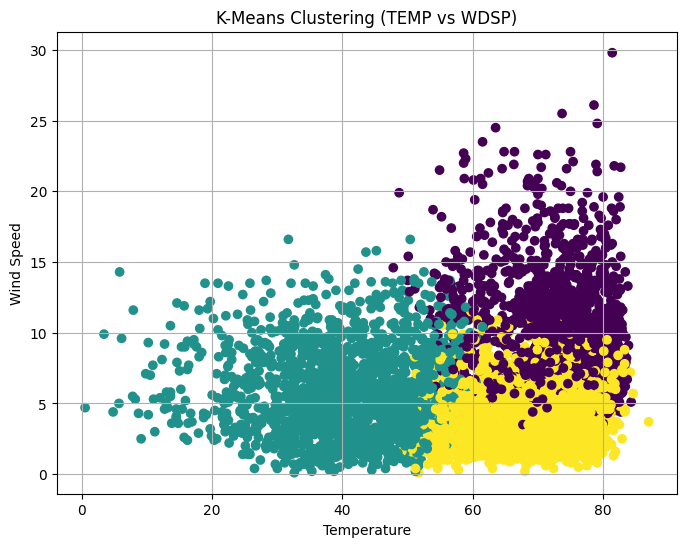

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_filtered['TEMP'], df_filtered['WDSP'], c=df_filtered['Cluster'], cmap='viridis')
plt.xlabel('Temperature')
plt.ylabel('Wind Speed')
plt.title('K-Means Clustering (TEMP vs WDSP)')
plt.grid(True)
plt.show()


In [ ]:
!pip install prophet


In [ ]:
import pandas as pd

# Use a copy of original data
df_ts = df[['DATE', 'TEMP']].dropna()

# Convert to datetime
df_ts['DATE'] = pd.to_datetime(df_ts['DATE'])

# Average daily temp if multiple records per day
df_daily = df_ts.groupby('DATE').mean().reset_index()

# Prophet requires 'ds' and 'y' column names
df_prophet = df_daily.rename(columns={'DATE': 'ds', 'TEMP': 'y'})

df_prophet.head()
from prophet import Prophet

# Initialize and fit
model = Prophet()
model.fit(df_prophet)

# Create a future dataframe (e.g., forecast 365 days ahead)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmpkz8pn5/6jtwm2t0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmpkz8pn5/p73o91i1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56722', 'data', 'file=/tmp/tmpmpkz8pn5/6jtwm2t0.json', 'init=/tmp/tmpmpkz8pn5/p73o91i1.json', 'output', 'file=/tmp/tmpmpkz8pn5/prophet_modelknbmbq66/prophet_model-20250421180631.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:06:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:06:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
from prophet.plot import plot_plotly
import plotly.graph_objs as go

plot_plotly(model, forecast)
